In [1]:
#Carregando  bibliotecas
import pandas as pd
import io
import os
import csv

In [2]:
caminho_arquivo = 'Dataset/obras.csv'

# Checando se o caminho do arquivo é válido

In [3]:
print('Arquivo existe?', os.path.exists(caminho_arquivo))
try:
    with open(caminho_arquivo, 'r', encoding='utf-8') as f:
        print('Arquivo pode ser aberto!')
except Exception as e:
    print('Erro ao abrir o arquivo:', e)

Arquivo existe? True
Arquivo pode ser aberto!


# Checando a quantidade de linhas do arquivo que não estão em coformidade

In [6]:
with open(caminho_arquivo, 'r', encoding='utf-8') as f:
    cont = 0
    for i, linha in enumerate(f):
        if linha.count(';')+1 > 9: #contar somente as linhas com mais de 9 colunas
            cont +=1
    print(f"A quantidade de linhas com mais de 9 colunas é: {cont}")

A quantidade de linhas com mais de 9 colunas é: 141


# Primeiro teste de normalização dos dados

In [8]:
# fazendo alterações do arquivo para o separador
texto_normalizado = caminho_arquivo.replace(',', ';')

In [9]:
arquivo_normalizado = io.StringIO(texto_normalizado)

In [10]:
df = pd.read_csv(arquivo_normalizado)

In [11]:
df.head()

,Dataset/obras.csv


In [12]:
   # Exportar para CSV, sem a coluna de índice
df.to_csv('arquivo_tratado.csv', index=False)

In [13]:
df2 = pd.read_csv('arquivo_tratado.csv')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 0 entries
Data columns (total 1 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dataset/obras.csv  0 non-null      object
dtypes: object(1)
memory usage: 132.0+ bytes


# Fazendo um tratamento a partir da biblioteca padrão de arquivos csv

In [15]:
dados = []
with open(caminho_arquivo, 'r', encoding='utf-8') as f:
    leitor = csv.reader(f, delimiter=';')
    for linha in leitor:
        if len(linha) > 9:
            # Junta tudo após o oitavo índice na última coluna
            nova_linha = linha[:8] + [';'.join(linha[8:])]
            dados.append(nova_linha)
        else:
            dados.append(linha)

# Exibir as 5 primeiras linhas
for l in dados[:5]:
    print(l)

['\ufeffMunicípio', 'Situação', 'Âmbito', 'Valor do Contrato', 'Contratada', 'CNPJ da Contratada', 'Contratante', 'Ano do Contrato', 'Descrição da Obra']
['Adamantina', 'Em execução  no prazo', 'MUNICIPAL', '149900', 'CONSTRUTORA LAIS LTDA', '65.437.543/000116', 'CENTRO UNIVERSITÁRIO DE ADAMANTINA', '2024', 'CONTRATAÇÃO DE EMPRESA DE ENGENHARIA ESPECIALIZADA EM SERVIÇOS DE IMPERMEABILIZAÇÃO NAS LAJES EXPOSTAS DO BLOCO V  CAMPUS II']
['Adamantina', 'Em execução  no prazo', 'MUNICIPAL', '190000', 'CONSTRUTORA LAIS LTDA', '65.437.543/000116', 'CENTRO UNIVERSITÁRIO DE ADAMANTINA', '2024', 'CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA EXECUÇÃO DE REFORMA EM TELHADO DE SETORES ADMINISTRATIVOS DO CAMPUS I DO CENTRO UNIVERSITÁRIO DE ADAMANTINA INCLUSOS MÃO DE OBRA E MATERIAIS']
['Adamantina', 'Em execução  no prazo', 'MUNICIPAL', '171922,66', 'RYAN CARLOS LOPES SANTOS LTDA', '45.144.840/000166', 'CENTRO UNIVERSITÁRIO DE ADAMANTINA', '2023', 'CONTRATACAO DE EMPRESA ESPECIALIZADA PARA CONSTRUCAO DE

In [16]:
# Exibir as linhas identificadas com problema inicialmente
print(dados[4])
print(dados[57])

['Adamantina', 'Em execução  no prazo', 'MUNICIPAL', '619313,93', 'JG ESQUADRIAS METALICAS LTDA', '11.011.268/000145', 'CENTRO UNIVERSITÁRIO DE ADAMANTINA', '2022', 'CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA REALIZAÇÃO DE OBRAS DE ACESSIBILIDADE E COBERTURA DE RAMPA NO CAMPUS II (BLOCO) DA UNIFAI']
['Altinópolis', 'Em execução  atrasada', 'MUNICIPAL', '725000', 'CARVALHO CONSTRUTORA INTERIOR LTDA', '31.275.491/000107', 'PREFEITURA MUNICIPAL DE ALTINÓPOLIS', '2024', 'CONTRATAÇÃO DE EMPRESA VISANDO A CONSTRUÇÃO DA PRAÇA DA BÍBLIA']


# Transformando os dados tratados (lista de listas) em um DataFrame

In [17]:
df_tratado = pd.DataFrame(dados[1:], columns=dados[0])
df_tratado.head()

,﻿Município,Situação,Âmbito,Valor do Contrato,Contratada,CNPJ da Contratada,Contratante,Ano do Contrato,Descrição da Obra
0,Adamantina,Em execução no prazo,MUNICIPAL,149900,CONSTRUTORA LAIS LTDA,65.437.543/000116,CENTRO UNIVERSITÁRIO DE ADAMANTINA,2024,CONTRATAÇÃO DE EMPRESA DE ENGENHARIA ESPECIALI...
1,Adamantina,Em execução no prazo,MUNICIPAL,190000,CONSTRUTORA LAIS LTDA,65.437.543/000116,CENTRO UNIVERSITÁRIO DE ADAMANTINA,2024,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA EXEC...
2,Adamantina,Em execução no prazo,MUNICIPAL,"171922,66",RYAN CARLOS LOPES SANTOS LTDA,45.144.840/000166,CENTRO UNIVERSITÁRIO DE ADAMANTINA,2023,CONTRATACAO DE EMPRESA ESPECIALIZADA PARA CONS...
3,Adamantina,Em execução no prazo,MUNICIPAL,"619313,93",JG ESQUADRIAS METALICAS LTDA,11.011.268/000145,CENTRO UNIVERSITÁRIO DE ADAMANTINA,2022,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA REAL...
4,Adamantina,Em execução no prazo,MUNICIPAL,"6778283,62",CONSTRUTORA ALPHA VITORIA LTDA,06.122.379/000199,CENTRO UNIVERSITÁRIO DE ADAMANTINA,2019,CONTRATAÇÃO DE EMPRESA ESPECIALIZADA PARA FORN...


In [18]:
df_tratado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8304 entries, 0 to 8303
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ﻿Município          8304 non-null   object
 1   Situação            8304 non-null   object
 2   Âmbito              8304 non-null   object
 3   Valor do Contrato   8304 non-null   object
 4   Contratada          8304 non-null   object
 5   CNPJ da Contratada  8304 non-null   object
 6   Contratante         8304 non-null   object
 7   Ano do Contrato     8304 non-null   object
 8   Descrição da Obra   8304 non-null   object
dtypes: object(9)
memory usage: 584.0+ KB


<Axes: >

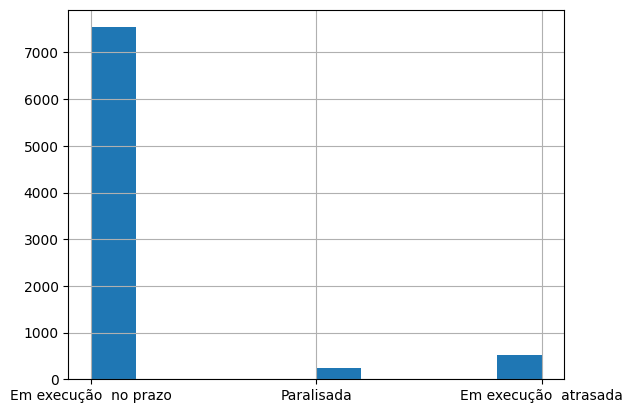

In [ ]:
df_tratado['Situação'].hist()

<Axes: >

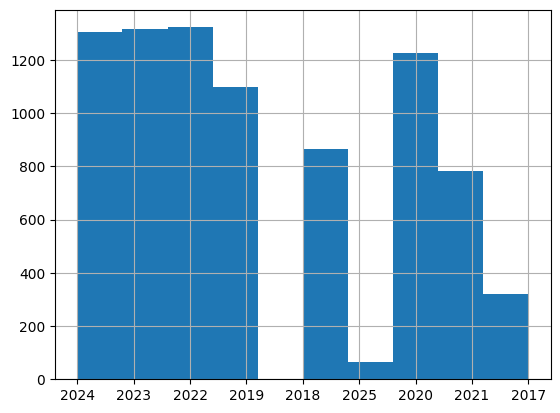

In [20]:
df_tratado['Ano do Contrato'].hist()

In [33]:
#Excluindo o ano de 2025 pois ainda não é um ano completo
df_filtrado = df_tratado[df_tratado['Ano do Contrato'] != '2025']


In [43]:
df_filtrado['Ano do Contrato'].sort_values()

4148    2017
3042    2017
3043    2017
6724    2017
6533    2017
        ... 
5020    2024
5021    2024
5022    2024
5031    2024
8303    2024
Name: Ano do Contrato, Length: 8240, dtype: object

/tmp/ipykernel_16544/4129112234.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado['Ano do Contrato'] = df_filtrado['Ano do Contrato'].sort_values()


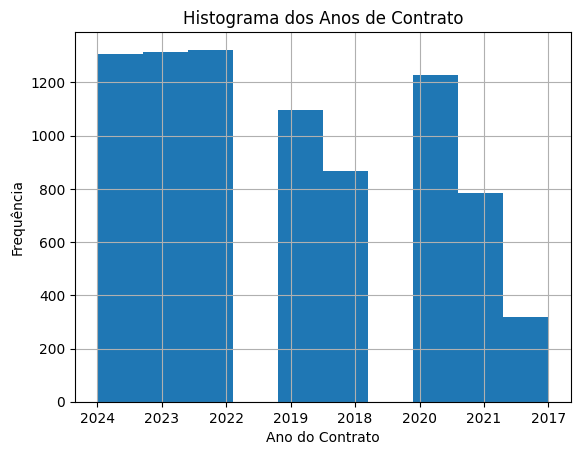

In [42]:
import matplotlib.pyplot as plt

# Ordenando os dados da coluna 'Ano do Contrato'
df_filtrado['Ano do Contrato'] = df_filtrado['Ano do Contrato'].sort_values()

#Plotando o histograma
df_filtrado['Ano do Contrato'].hist()
plt.title('Histograma dos Anos de Contrato')
plt.xlabel('Ano do Contrato')
plt.ylabel('Frequência')
plt.show()

<Axes: >

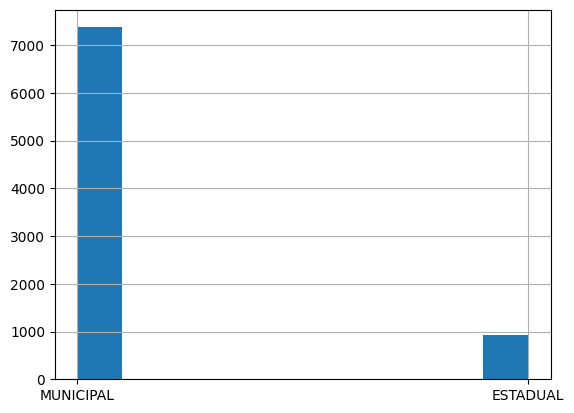

In [28]:
df_tratado['Âmbito'].hist()

<Axes: xlabel='Ano do Contrato', ylabel='Situação'>

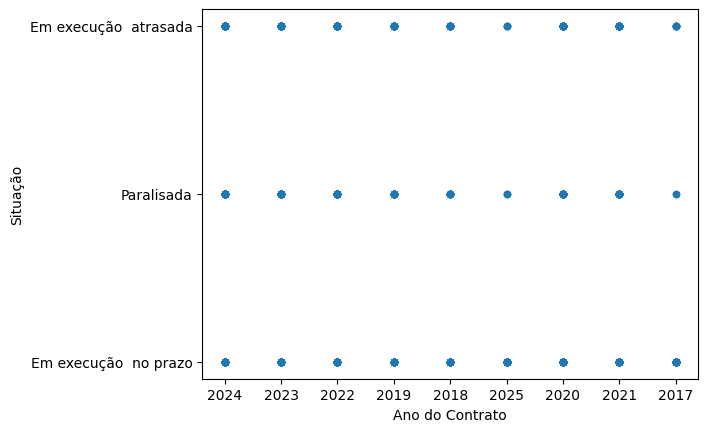

In [31]:
df_tratado.plot(x='Ano do Contrato', y='Situação', kind='scatter')

<Axes: xlabel='Âmbito', ylabel='Situação'>

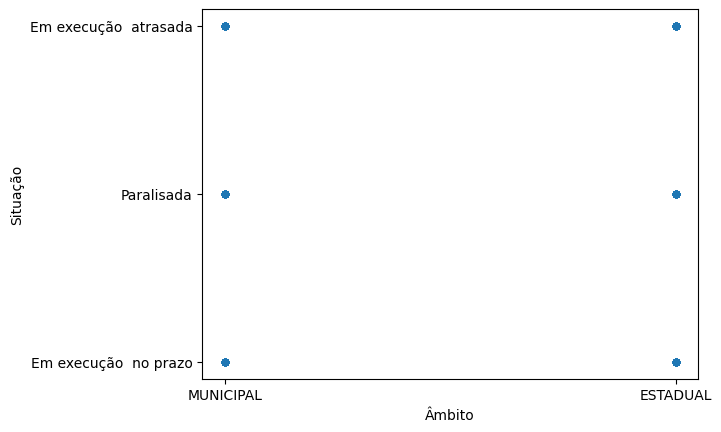

In [26]:
df_tratado.plot(x='Âmbito', y='Situação', kind='scatter')

In [35]:
df_tratado['Contratante'].unique()         

array(['CENTRO UNIVERSITÁRIO DE ADAMANTINA',
       'PREFEITURA MUNICIPAL DE ADAMANTINA',
       'PREFEITURA MUNICIPAL DE AGUAÍ',
       'PREFEITURA MUNICIPAL DE ÁGUAS DE LINDÓIA',
       'PREFEITURA MUNICIPAL DE ÁGUAS DE SANTA BÁRBARA',
       'PREFEITURA MUNICIPAL DE ÁGUAS DE SÃO PEDRO',
       'CÂMARA MUNICIPAL DE AGUDOS', 'PREFEITURA MUNICIPAL DE AGUDOS',
       'PREFEITURA MUNICIPAL DE ALAMBARI',
       'PREFEITURA MUNICIPAL DE ALFREDO MARCONDES',
       'PREFEITURA MUNICIPAL DE ALTAIR/SP',
       'PREFEITURA MUNICIPAL DE ALTINÓPOLIS',
       'PREFEITURA MUNICIPAL DE ALTO ALEGRE',
       'CÂMARA MUNICIPAL DE ÁLVARES FLORENCE',
       'PREFEITURA MUNICIPAL DE ÁLVARES FLORENCE',
       'PREFEITURA MUNICIPAL DE ÁLVARES MACHADO',
       'PREFEITURA MUNICIPAL DE ALVINLÂNDIA',
       'PREFEITURA MUNICIPAL DE AMERICANA',
       'PREFEITURA MUNICIPAL DE AMÉRICO BRASILIENSE',
       'PREFEITURA MUNICIPAL DE AMPARO',
       'SAAE  SERVIÇO AUTÔNOMO DE ÁGUA E ESGOTO',
       'CÂMARA MUNICIPAL

<Axes: xlabel='Âmbito'>

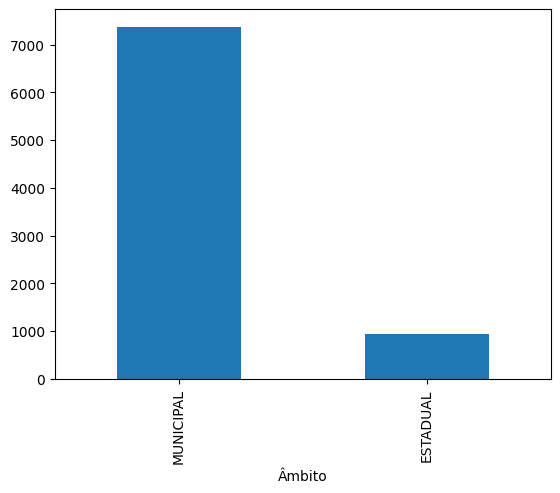

In [36]:
df_tratado['Âmbito'].value_counts().plot(kind='bar')

<Axes: xlabel='Situação'>

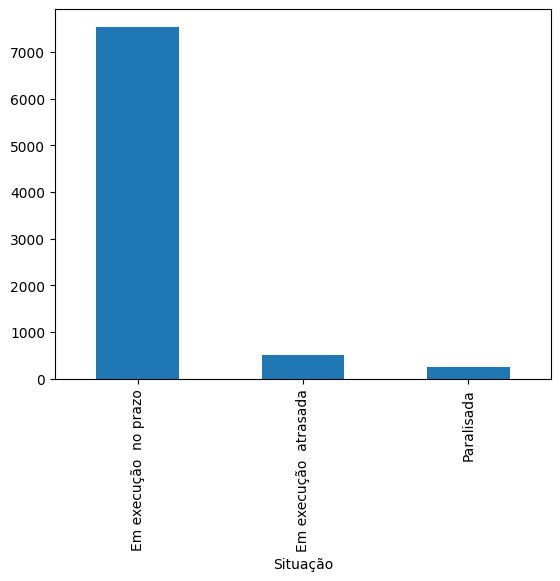

In [37]:
df_tratado['Situação'].value_counts().plot(kind='bar')

In [38]:
frequencia_percentual = df_tratado['Situação'].value_counts(normalize=True) * 100
frequencia_percentual = frequencia_percentual.round(1)

print(frequencia_percentual)

Situação
Em execução  no prazo    90.8
Em execução  atrasada     6.2
Paralisada                3.0
Name: proportion, dtype: float64


In [ ]:
# Assumindo que você tenha uma coluna 'year' no seu DataFrame 'df'

# Calcula a frequência de cada tipo de trabalho por ano
frequencia_por_ano = df_tratado.groupby('Ano do Contrato')['Situação'].value_counts()

# Calcula o total de observações por ano para normalização
total_por_ano = df_tratado.groupby('Ano do Contrato').size()

# Calcula a frequência percentual por ano e por tipo de trabalho
frequencia_percentual_por_ano = (frequencia_por_ano_job / total_por_ano).mul(100).round(1)

print(frequencia_percentual_por_ano)

Ano do Contrato  Situação             
2017             Em execução  no prazo    97.2
                 Em execução  atrasada     2.2
                 Paralisada                0.6
2018             Em execução  no prazo    96.5
                 Em execução  atrasada     2.2
                 Paralisada                1.3
2019             Em execução  no prazo    95.7
                 Paralisada                2.2
                 Em execução  atrasada     2.1
2020             Em execução  no prazo    95.9
                 Em execução  atrasada     2.3
                 Paralisada                1.8
2021             Em execução  no prazo    93.6
                 Em execução  atrasada     3.7
                 Paralisada                2.7
2022             Em execução  no prazo    88.6
                 Em execução  atrasada     7.8
                 Paralisada                3.6
2023             Em execução  no prazo    84.1
                 Em execução  atrasada    11.5
                 Para

In [43]:
# Contagem de obras por ano (número bruto)
contagem_por_ano = df_tratado['Ano do Contrato'].value_counts().sort_index()

# Converter para int quando possível (caso os anos venham como strings)
try:
    contagem_por_ano.index = contagem_por_ano.index.astype(int)
    contagem_por_ano = contagem_por_ano.sort_index()
except Exception:
    pass

# Mostrar a contagem por ano
print('Contagem de obras por Ano do Contrato:')
print(contagem_por_ano)

# Frequência percentual por ano (opcional)
frequencia_percentual_ano = (contagem_por_ano / contagem_por_ano.sum()).mul(100).round(1)
print(frequencia_percentual_ano)












# Verificando a validade do arquivo nessa codificaçãoplt.show()plt.tight_layout()plt.title('Quantidade de obras por ano')plt.ylabel('Quantidade de Obras')plt.xlabel('Ano do Contrato')contagem_por_ano.plot(kind='bar')plt.figure(figsize=(10,5))import matplotlib.pyplot as plt# Plotar gráfico de barras simples (funciona dentro do notebook)print(frequencia_percentual_ano)Frequência percentual por ano:')

Contagem de obras por Ano do Contrato:
Ano do Contrato
2017     319
2018     867
2019    1098
2020    1227
2021     784
2022    1323
2023    1315
2024    1307
2025      64
Name: count, dtype: int64
Ano do Contrato
2017     3.8
2018    10.4
2019    13.2
2020    14.8
2021     9.4
2022    15.9
2023    15.8
2024    15.7
2025     0.8
Name: count, dtype: float64
